In [159]:
data <- read.csv("activity.csv")

In [170]:
library(ggplot2)

[1] 9354.23

[1] 10395

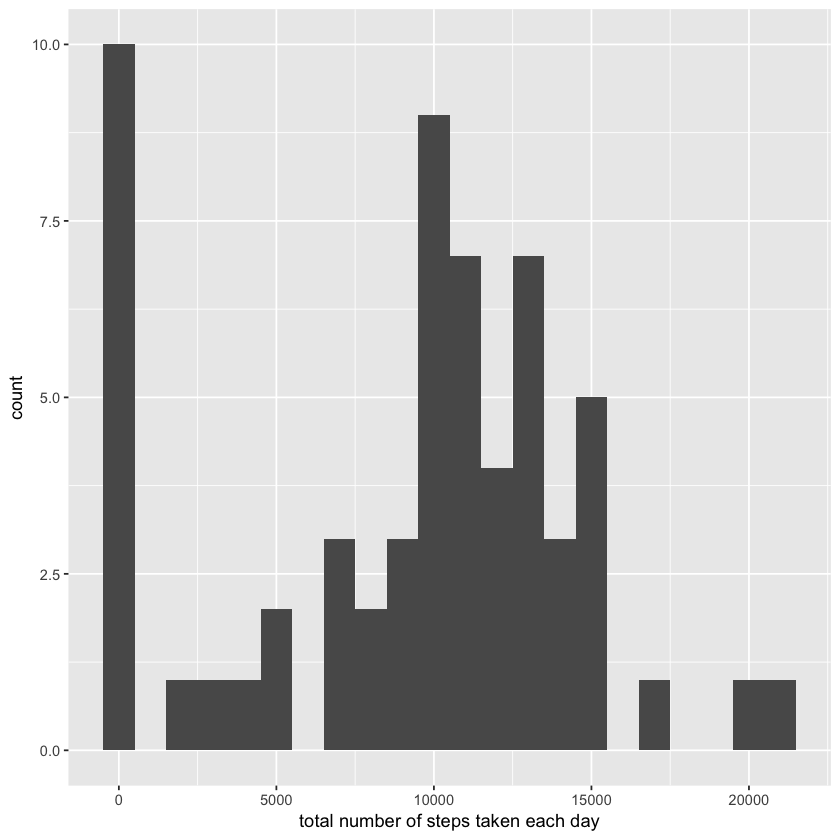

In [171]:
totalSteps <- tapply(data$steps, data$date, FUN=sum, na.rm=TRUE)
qplot(totalSteps, binwidth=1000, xlab="total number of steps taken each day")
mean(totalSteps, na.rm=TRUE)
median(totalSteps, na.rm=TRUE)

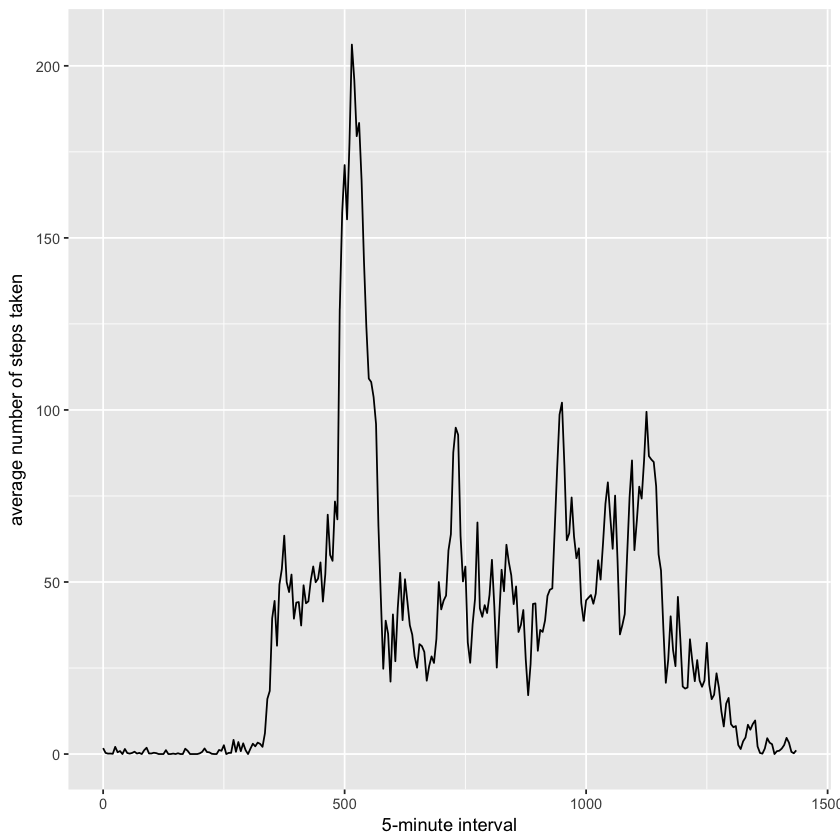

In [172]:
averages <- aggregate(x=list(steps=data$steps), by=list(interval=data$interval),
                      FUN=mean, na.rm=TRUE)
ggplot(data=averages, aes(x=interval, y=steps)) +
    geom_line() +
    xlab("5-minute interval") +
    ylab("average number of steps taken")

In [173]:
averages[which.max(averages$steps),]

,interval,steps
104,515,206.1698


In [174]:
missingSteps <- is.na(data$steps)
table(missingSteps)

missingSteps
FALSE  TRUE 
15264  2304 

In [177]:
# Replace missing step value with the mean value of its 5-minute interval
fillValue <- function(steps, interval) {
    filled <- NA
    if (!is.na(steps))
        filled <- c(steps)
    else
        filled <- (averages[averages$interval==interval, "steps"])
    return(filled)
}
processedData <- data
processedData$steps <- mapply(fillValue, filled.data$steps, filled.data$interval)

[1] 10766.19

[1] 10766.19

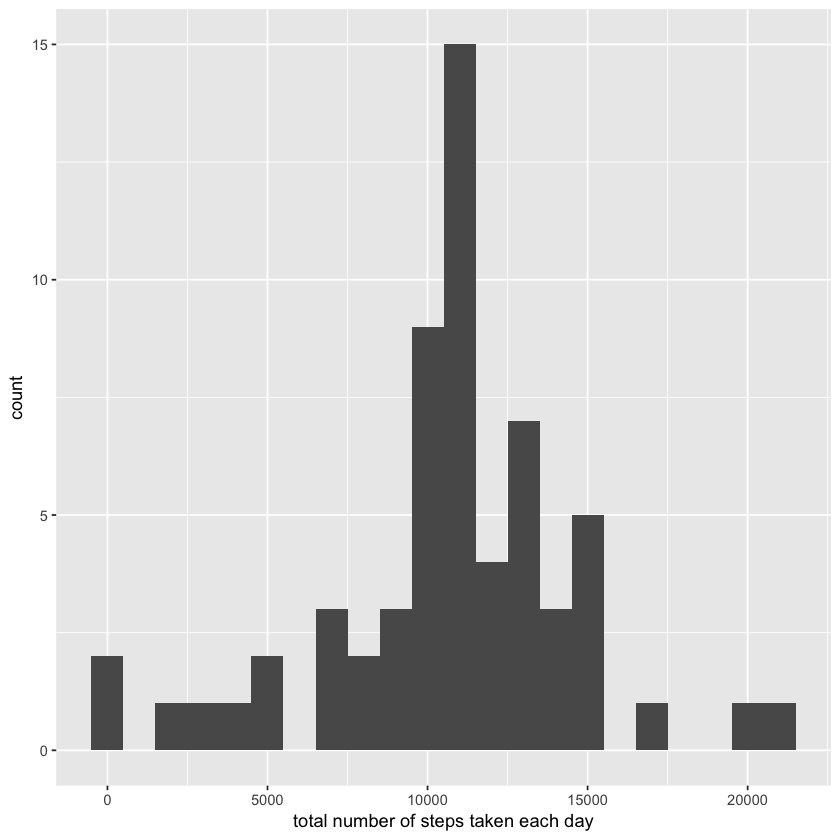

In [178]:
totalSteps <- tapply(processedData$steps, processedData$date, FUN=sum)
qplot(totalSteps, binwidth=1000, xlab="total number of steps taken each day")
mean(totalSteps)
median(totalSteps)

In [181]:
whichDayOfTheWeek <- function(date) {
    day <- weekdays(date)
    if (day %in% c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday"))
        return("weekday")
    else if (day %in% c("Saturday", "Sunday"))
        return("weekend")
    else
        stop("invalid date")
}
processedData$date <- as.Date(processedData$date)
processedData$day <- sapply(processedData$date, FUN=whichDayOfTheWeek)

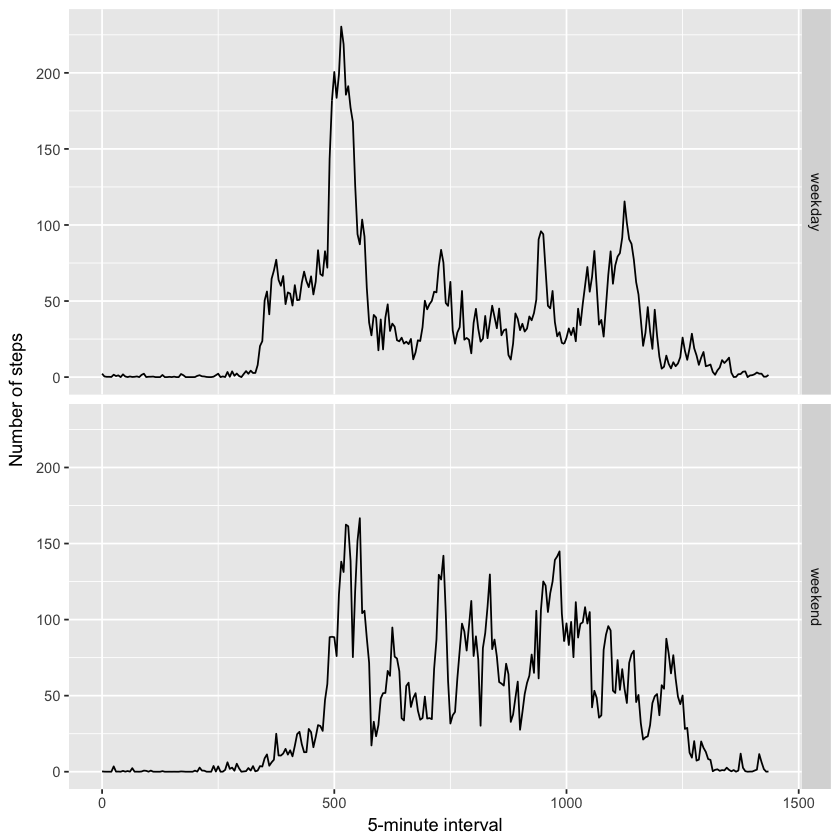

In [183]:
averages <- aggregate(steps ~ interval + day, data=processedData, mean)
ggplot(averages, aes(interval, steps)) + geom_line() + facet_grid(day ~ .) +
    xlab("5-minute interval") + ylab("Number of steps")